In [14]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [15]:
sheltered_data_to_load = Path("Sheltered Homeless Population.csv")
population_data_to_load = Path("Homeless Population by State.csv")
weather_data_to_load= Path("Severe Weather Data.csv")

homeless_sheltered= pd.read_csv(sheltered_data_to_load)
homeless_population= pd.read_csv(population_data_to_load)
weather_data= pd.read_csv(weather_data_to_load)

homeless_merged= pd.merge(homeless_sheltered, homeless_population, how="outer", on= ["State", "State"])
homeless_weather_merged= pd.merge(homeless_merged, weather_data, how="outer", on= ["State", "State"])
homeless_weather_merged.head()

,State,sheltered homeless population,percentage of homeless population that is sheltered,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,days over 90F,Harsh Winter
0,Alabama,2172.0,60.0,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0,42.0,NO
1,Alaska,1963.0,85.0,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0,0.0,YES
2,Arizona,5526.0,41.0,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0,176.0,NO
3,Arkansas,1163.0,47.0,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0,66.0,NO
4,California,56030.0,33.0,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0,90.0,NO


In [16]:
homeless_weather_merged= homeless_weather_merged.rename(columns={'percentage of homeless population that is sheltered':'percent population sheltered','Total':'TotalPopulation'})
homeless_weather_merged.head()

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,days over 90F,Harsh Winter
0,Alabama,2172.0,60.0,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0,42.0,NO
1,Alaska,1963.0,85.0,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0,0.0,YES
2,Arizona,5526.0,41.0,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0,176.0,NO
3,Arkansas,1163.0,47.0,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0,66.0,NO
4,California,56030.0,33.0,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0,90.0,NO


In [17]:
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_weather_merged['ChronicPer10k'] = \
    homeless_weather_merged['Per10kResidents'] * homeless_weather_merged['ChronicallyHomeless'] / homeless_weather_merged['TotalPopulation']
# Create ShelteredPer10k column to calculate sheltered homeless population per 10,000 residents

homeless_weather_merged['ShelteredPer10k'] = \
    homeless_weather_merged['Per10kResidents'] * homeless_weather_merged['sheltered homeless population'] / homeless_weather_merged['TotalPopulation']

homeless_weather_merged.head()

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,days over 90F,Harsh Winter,ChronicPer10k,ShelteredPer10k
0,Alabama,2172.0,60.0,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0,42.0,NO,1.063060,4.283795
1,Alaska,1963.0,85.0,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0,0.0,YES,7.870345,26.822026
2,Arizona,5526.0,41.0,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0,176.0,NO,3.398037,7.583826
3,Arkansas,1163.0,47.0,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0,66.0,NO,1.238552,3.830948
4,California,56030.0,33.0,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0,90.0,NO,14.716052,14.275284


In [18]:
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced = homeless_weather_merged.loc[:, ['State','sheltered homeless population','percent population sheltered','TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k','ShelteredPer10k']]
homeless_reduced.head()

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k,ShelteredPer10k
0,Alabama,2172.0,60.0,3752.0,7.4,539.0,1.063060,4.283795
1,Alaska,1963.0,85.0,2320.0,31.7,576.0,7.870345,26.822026
2,Arizona,5526.0,41.0,13553.0,18.6,2476.0,3.398037,7.583826
3,Arkansas,1163.0,47.0,2459.0,8.1,376.0,1.238552,3.830948
4,California,56030.0,33.0,171521.0,43.7,57760.0,14.716052,14.275284


In [19]:
# Regression analysis for each of the pairs below.

# Define a function
def plot_linear_regression(x_values, y_values, x_axis, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

The r-squared value is: nan
The r value is: nan
The p value is: nan


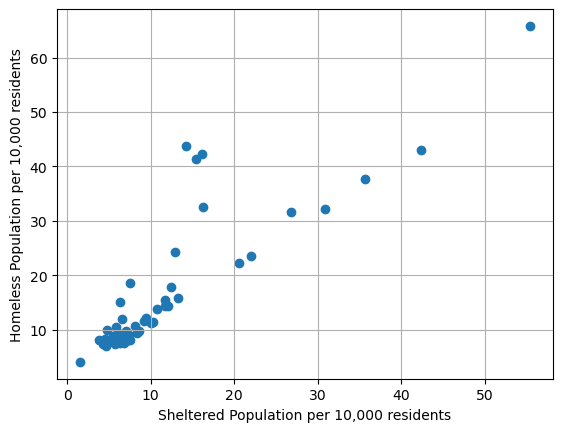

In [20]:
x_values = homeless_reduced["ShelteredPer10k"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Sheltered Population per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

The r-squared value is: nan
The r value is: nan
The p value is: nan


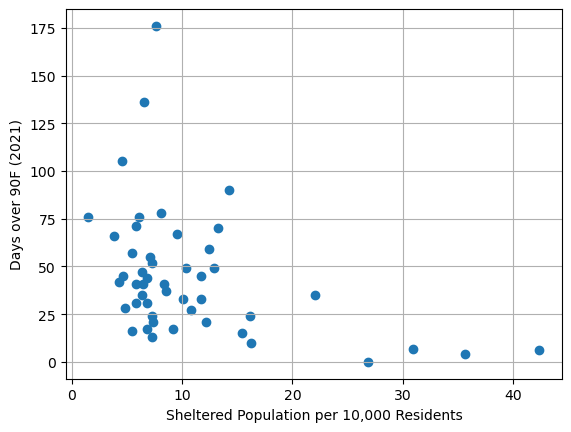

In [35]:
x_values = homeless_weather_merged["ShelteredPer10k"]
y_values = homeless_weather_merged["days over 90F"]
plot_linear_regression(x_values, y_values, "Sheltered Population per 10,000 Residents", "Days over 90F (2021)", (50, -50))

In [32]:
harsh_winter= homeless_weather_merged.groupby("Harsh Winter")["percent population sheltered"].mean()
harsh_winter

Harsh Winter
NO     66.714286
YES    84.000000
Name: percent population sheltered, dtype: float64

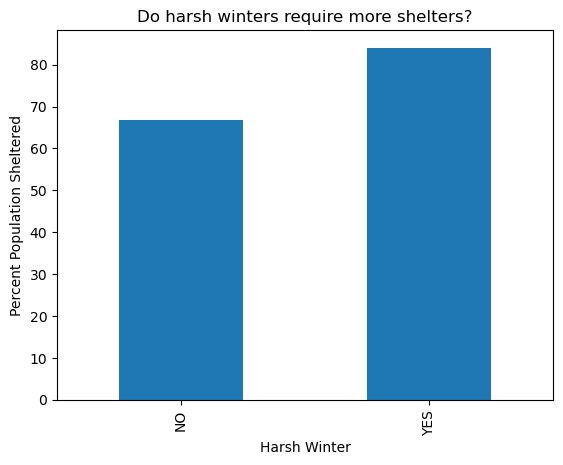

In [34]:
harsh_winter.plot(kind="bar")
plt.xlabel('Harsh Winter')
plt.ylabel('Percent Population Sheltered')
plt.title('Do harsh winters require more shelters?')
plt.show()